In [1]:
from db_communication import db_communication
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None

### Init tables/ dataframes

In [2]:
config = {
    'user': 'root',
    'password': 'FDS-apm1',
    'host': 'min-ifm-xdm.ad.fh-bielefeld.de',
    'port': '3306',
    'database': 'Fahrradshop' 
}
my_db = db_communication(config)

Successfully connected.


In [3]:
customer_df = my_db.get_table('Kunde')
order_df = my_db.get_table("Auftrag")
cluster_df = my_db.get_table('Merkmalcluster')
parts_df = my_db.get_table('Einzelteile')
features_df = my_db.get_table('Merkmale')

config_df = my_db.get_table('Konfiguration')
#config_df.index = pd.MultiIndex.from_arrays([config_df['AuftragNr'],config_df['KonfigNr']])
#config_df = config_df['MerkmalNr'].to_frame()

assemblyGroup_df = my_db.get_table("Arbeitsschrittgruppe")
assemblyStep_df = my_db.get_table("Arbeitsschritt")
sequence_df = my_db.get_table("Reihenfolgevorgabe")

### Test scenarios to validate the project increment
(scenarios are written in german)

__Szenario 1:__ <br> 
Es soll ein wilkürlicher Auftrag aus der Datenbank ausgewählt werden, dessen Kunde und zugehörige Fahrradkonfiguration ausgegeben werden soll

In [16]:
rand_order = order_df.sample()
rand_order

,AuftrNr,Bestelldatum,Lieferdatum,KundenNr
4,5,2020-03-13,2020-03-27,3


In [17]:
# get customer
customer_df[customer_df['KundenNr'].astype(int) == rand_order['KundenNr'].values[0]]

,KundenNr,Name,Vorname,Mail
2,3,Hilton,Clingerman,hilton.clingerman@gmail.com


In [18]:
# get configuration
rand_order_config = config_df[config_df['AuftragNr'].astype(int) == rand_order['AuftrNr'].values[0]]
rand_order_config['Merkmal Bezeichnung'] = rand_order_config['MerkmalNr'].replace(dict(zip(features_df['MerkmalNr'],features_df['Bezeichnung'])))
rand_order_config

,KonfigNr,AuftragNr,MerkmalNr,Merkmal Bezeichnung
44,500,5,100009,Rennrad Junior
45,501,5,200001,Federung Standard
46,502,5,300007,Blau metallic
47,503,5,400005,Lenker Standard mit Hoernern
48,504,5,500004,Rennradfelgen Pro
49,505,5,600006,Bereifung Sport
50,506,5,700005,Rennradschaltung
51,507,5,800005,Rennradsattel Herren
52,508,5,900003,Scheibenbremse Standard
53,509,5,1000005,Beleuchtung Pro


__Szenario 2:__ <br>
Das in 'Szenario 1' ausgewählte Fahrrad soll in seine Einzelteile mittels der Datenbank aufgelistet werden

In [7]:
# mask to match 'rand_order_config' in 'assemblyStep_df'
mask = [True if assembly_row in rand_order_config['MerkmalNr'].values else False for assembly_row in assemblyStep_df['MerkmalNr']]
rand_order_assemblySteps = assemblyStep_df[mask]

In [8]:
# list features by parts 
mul_index = pd.MultiIndex.from_arrays([
    rand_order_assemblySteps['MerkmalNr'].replace(dict(zip(features_df['MerkmalNr'].astype(int),features_df['Bezeichnung']))).values,
    rand_order_assemblySteps['EinzelteilNr'].replace(dict(zip(parts_df['EinzelteilNr'].astype(int),parts_df['Bezeichnung']))).values
                        ])
pd.DataFrame(index=mul_index)

Empty DataFrame
Columns: []
Index: [(Rennrad Junior, Giant Trinity Advanced Pro Time Trial), (Rennrad Junior, Kein Fahradstaender), (Rennrad Junior, Kein Gepaecktraeger), (Gelaendefederung Standard, RockShox 30 Gold RL SA Federgabel), (Blau uni, Blau Uni Basislack), (Blau uni, 2K HS-Klarlack), (Blau uni, 2K HS Haerter fuer Klarlack), (Blau uni, Silikonentferner), (Lenker Retro mit Hupe, Humpert Country Lenker), (Lenker Retro mit Hupe, Red Cycling Products Urban Classic Grip), (Lenker Retro mit Hupe, Fischer 85803 BALLHUPE), (Rennradschaltung Pro, SRAM Red DUB 2-fach AXS), (Rennradschaltung Pro, SRAM Red eTap AXS HRD FM), (Rennradschaltung Pro, Schaltwerk SRAM Red eTap AXS mit Batterie), (Rennradschaltung Pro, SRAM Red 12-fach), (Rennradschaltung Pro, SRAM XG-1290), (Rennradschaltung Pro, Umwerfer SRAM Red eTap AXS mit Batterie), (Rennradschaltung Pro, Kein Kettenschutz), (Rennradsattel Damen, Selle Italia SLR Boost TI Sattel black), (Scheibenbremse Standard, Shimano BL-T4000 Bremshebel), (Scheibenbremse Standard, Shimano BR-R7000 Felgenbremse Dual-Pivot Hinterrad CS-51), (Scheibenbremse Standard, Jagwire Mountain Sport), (Scheibenbremse Standard, Shimano Alfine BL-S7000 Scheibenbremse I-Spec II Vorne), (Scheibenbremse Standard, Shimano Deore SM-RT56 Bremsscheibe 6-loch), (Scheibenbremse Standard, Shimano BH90-JK-SSR), (Komfort Dynamobeleuchtung, Busch + Mueller Lumotec IQ Cyo N plus LED-Scheinwerfer), (Komfort Dynamobeleuchtung, Busch + Mueller Toplight Line plus Diodenrücklicht), (Komfort Dynamobeleuchtung, Dynamo RECHTS 6V/3W Überspannungsschutz Doppelanschluss Kunststoff), (Komfort Dynamobeleuchtung, AXA HR Traction Power Control Hochleistungsdynamo rechts schwarz), (Komfort Dynamobeleuchtung, Leuchtstreifen), (Rennradpedale, Time ATAC XC6 X-Country Pedale), (Rennrad Junior, Kein Schutzblech), (Rennrad Junior, Kein Schutzblech), (Felgen Standard, Exal BE21 Laufradsatz 29 Zoll Disc Comp), (Felgen Standard, Exal BE21 Laufradsatz 29 Zoll Disc Comp), (Bereifung Standard, Continental Ride Tour Reifen 26 x 1.75 Zoll Draht schwarz/weiss), (Bereifung Standard, Continental Ride Tour Reifen 26 x 1.75 Zoll Draht schwarz/weiss), (Bereifung Standard, NoTubes Universal Tubeless Ventil 35mm MTB), (Bereifung Standard, NoTubes Universal Tubeless Ventil 35mm MTB), (Bereifung Standard, Continental MTB 26 Zoll Schlauch), (Bereifung Standard, Continental MTB 26 Zoll Schlauch)]

__Szenario 3:__ <br>
Es sollen die Arbeitsschrittgruppen mit der Reihenfolgeplanung in Verbindung gebracht werden, um hieraus grafisch den Algorithmus zur Fertigung eines Fahrrades abzuleiten

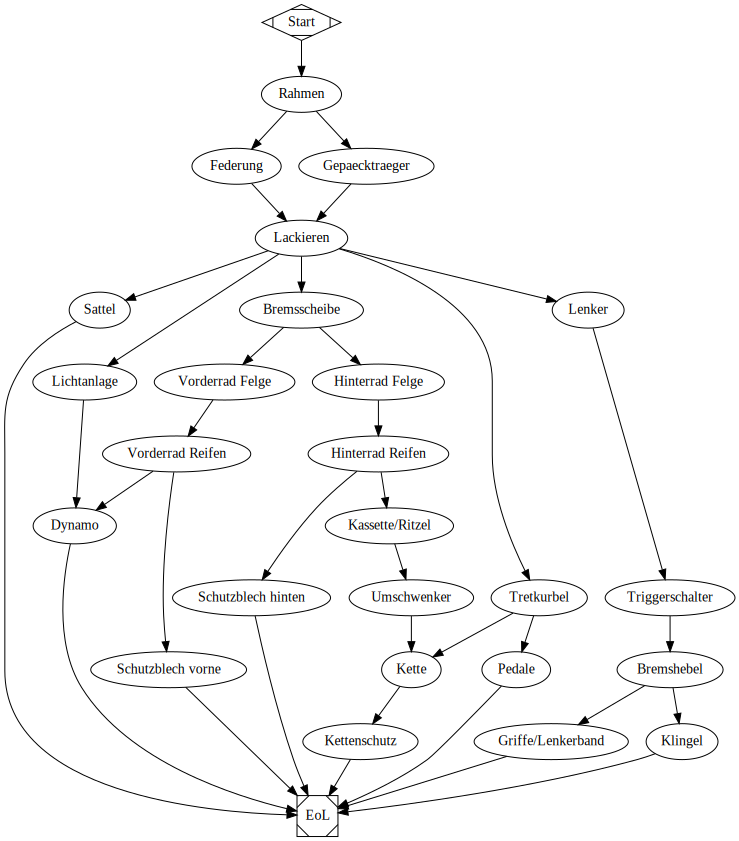

In [9]:
# HINT: need to install graphviz with 'conda install python-graphviz' and not only the python package
from graphviz import Digraph
dot = Digraph()

# mapping working group steps to name
workingGroupSteps_mapping = dict(zip(assemblyGroup_df['ArbeitsschrittgruppeNr'],assemblyGroup_df['Bezeichnung']))

# add nodes to the graph
for node in assemblyGroup_df['Bezeichnung']:
    dot.node(str(node))
dot.node('Start', shape='Mdiamond')
dot.edge('Start','Rahmen')
dot.node('EoL', shape='Msquare')

# add edges to the graph
for _,row in sequence_df.replace(workingGroupSteps_mapping).iterrows():
    currentNr = row.iloc[0]
    nextNr = row.iloc[1]
    if currentNr != nextNr:
        dot.edge(str(currentNr),str(nextNr))
    else: # reference to itself = end of line
        dot.edge(str(currentNr),'EoL')
        
# show graph
dot

In [10]:
# save graph
dot.render('assembly_graph',format='png',cleanup=True)

'assembly_graph.png'

__Szenario 4:__ <br>
Für den zufällig ausgewählten Auftrag soll nun der Fertigungsablauf mit den aufgeführten Einzelteilen angezeigt werden

In [11]:
rand_order_assemblySteps['MerkmalNr'].replace(dict(zip(features_df['MerkmalNr'].astype(int),features_df['Bezeichnung'])),inplace=True)
rand_order_assemblySteps['EinzelteilNr'].replace(dict(zip(parts_df['EinzelteilNr'].astype(int),parts_df['Bezeichnung'])),inplace=True)
rand_order_assemblySteps['ArbeitsschrittgruppeNr'].replace(dict(zip(assemblyGroup_df['ArbeitsschrittgruppeNr'],assemblyGroup_df['Bezeichnung'])),inplace=True)

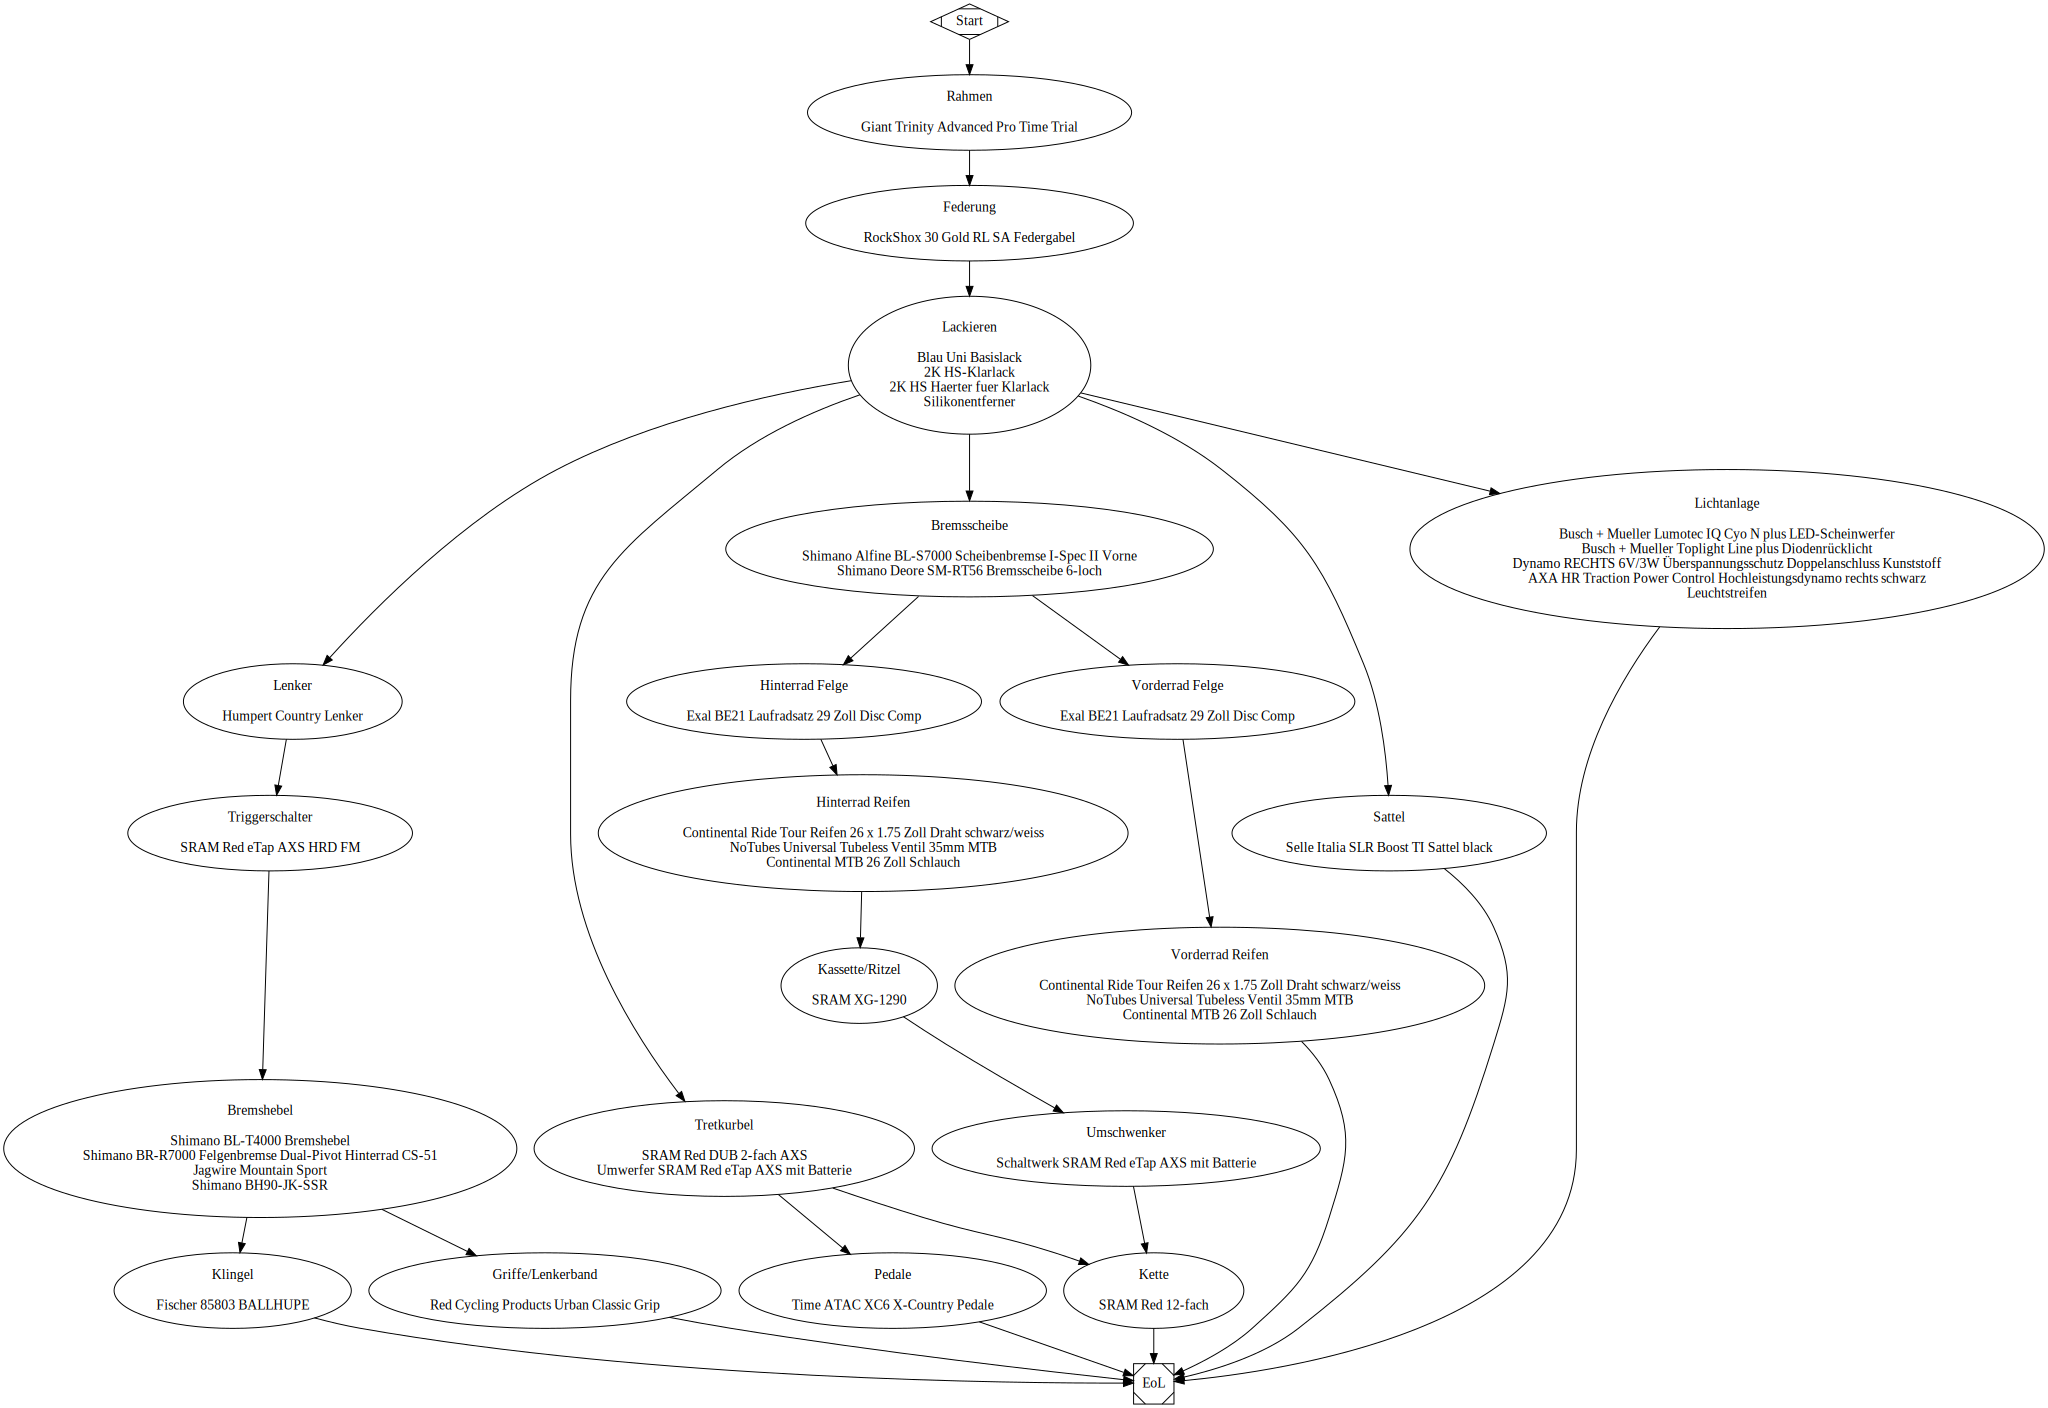

In [12]:
# HINT: need to install graphviz with 'conda install python-graphviz' and not only the python package
from graphviz import Digraph
dot = Digraph()

# mapping working group steps to name
workingGroupSteps_mapping = dict(zip(assemblyGroup_df['ArbeitsschrittgruppeNr'],assemblyGroup_df['Bezeichnung']))

uniques_lst = []

# add nodes to the graph
for cluster in rand_order_assemblySteps['ArbeitsschrittgruppeNr'].unique():
    
    parts_in_cluster = rand_order_assemblySteps[rand_order_assemblySteps['ArbeitsschrittgruppeNr'] == cluster]['EinzelteilNr'].values

    node_desc = ''
    for part in parts_in_cluster:
        if rand_order_assemblySteps[rand_order_assemblySteps['EinzelteilNr'] == part]['Montagezeit'].values[0] != None:
            node_desc += str(part) + '\n'
    if node_desc != '':
        uniques_lst.append(cluster)
        dot.node(str(cluster),label=str(cluster)+'\n\n'+node_desc)
    
    
dot.node('Start', shape='Mdiamond')
dot.edge('Start','Rahmen')
dot.node('EoL', shape='Msquare')


# mapping working group steps to name
workingGroupSteps_mapping = dict(zip(assemblyGroup_df['ArbeitsschrittgruppeNr'],assemblyGroup_df['Bezeichnung']))


# add edges to the graph
conections = []
for _,row in sequence_df.replace(workingGroupSteps_mapping).iterrows():
    currentNr = row.iloc[0]
    nextNr = row.iloc[1]
    if currentNr in uniques_lst and nextNr in uniques_lst:
        if currentNr != nextNr:
            conections.append((str(currentNr),str(nextNr)))
            dot.edge(str(currentNr),str(nextNr))
      #  else: # reference to itself = end of line
      #      dot.edge(str(currentNr),'EoL')


df_conections = pd.DataFrame(conections)
open_ends = [element for element in df_conections[1].values if element not in df_conections[0].values]
open_ends = np.unique(open_ends)
for open_end in open_ends:
    dot.edge(str(open_end),'EoL')
if 'Bremsscheibe' not in uniques_lst:
    dot.edge('Lackieren','Vorderrad Felge')
    dot.edge('Lackieren','Hinterrad Felge')

# show graph
dot

In [13]:
dot.view()

'Digraph.gv.pdf'

In [14]:
dot.render('assembly_graph_specific',format='png',cleanup=True)

'assembly_graph_specific.png'